# 0 - Sigmoid using matplotlib

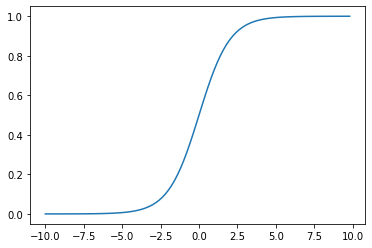

In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt

def sigmoid(x):
    a = []
    for item in x:
        a.append(1/(1+math.exp(-item)))
    return a

x = np.arange(-10., 10., 0.2)
sig = sigmoid(x)

plt.plot(x,sig)
plt.show()

# 1 - Logistic Regression (Titanic)

- In this exercise we will be applying Logistic regression on the titanic dataset to know if a passenger can survive or not.
- Dans cet exercice, nous appliquerons la régression logistique sur le dataframe titanic pour savoir si un passager peut survivre ou non.

---
- Let's start by importing some libraries (each time you need a library come add it below and execute the cell)
- Commençons par importer quelques bibliothèques (chaque fois que vous avez besoin d'une bibliothèque venez l'ajouter ci-dessous et exécutez la cellule)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.preprocessing  import LabelEncoder

- Import the dataframe, do all the preprocessing steps, vizualize some distributions if you want.
- Importez le dataframe, effectuez toutes les étapes de prétraitement, visualisez certaines distributions si vous le souhaitez.

In [ ]:
df = pd.read_csv("titanic.csv")

In [ ]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3.0,"Braund, Mr. Owen Harris",male,22.0,1.0,0.0,A/5 21171,7.2500,NaN,S
1,2,1.0,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1.0,0.0,PC 17599,71.2833,C85,C
2,3,1.0,3.0,"Heikkinen, Miss. Laina",female,26.0,0.0,0.0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1.0,0.0,113803,53.1000,C123,S
4,5,0.0,3.0,"Allen, Mr. William Henry",male,35.0,0.0,0.0,373450,8.0500,NaN,S
5,6,0.0,3.0,"Moran, Mr. James",male,NaN,0.0,0.0,330877,8.4583,NaN,Q
6,7,0.0,1.0,"McCarthy, Mr. Timothy J",male,54.0,0.0,0.0,17463,51.8625,E46,S
7,8,0.0,3.0,"Palsson, Master. Gosta Leonard",male,2.0,3.0,1.0,349909,21.0750,NaN,S
8,9,1.0,3.0,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0.0,2.0,347742,11.1333,NaN,S
9,10,1.0,2.0,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1.0,0.0,237736,30.0708,NaN,C


In [ ]:
liste=["Name",'PassengerId',"Ticket","Fare","Embarked"]
df.drop(liste, axis=1, inplace=True)

In [ ]:
df.head()


,Pclass,Sex,Age,SibSp,Parch,Cabin
0,3.0,male,22.0,1.0,0.0,NaN
1,1.0,female,38.0,1.0,0.0,C85
2,3.0,female,26.0,0.0,0.0,NaN
3,1.0,female,35.0,1.0,0.0,C123
4,3.0,male,35.0,0.0,0.0,NaN


In [ ]:
df.describe()

,Pclass,Age,SibSp,Parch
count,887.000000,704.000000,889.000000,887.000000
mean,2.310034,29.722543,0.523060,0.378805
std,0.836350,14.563191,1.103729,0.803998
min,1.000000,0.420000,0.000000,0.000000
25%,2.000000,20.875000,0.000000,0.000000
50%,3.000000,28.000000,0.000000,0.000000
75%,3.000000,38.000000,1.000000,0.000000
max,3.000000,80.000000,8.000000,6.000000


In [ ]:
df.isnull()

,Pclass,Sex,Age,SibSp,Parch,Cabin
0,False,False,False,False,False,True
1,False,False,False,False,False,False
2,False,False,False,False,False,True
3,False,False,False,False,False,False
4,False,False,False,False,False,True
...,...,...,...,...,...,...
886,False,False,False,False,False,True
887,False,False,False,False,False,False
888,False,False,True,False,False,True
889,False,False,False,False,False,False


In [ ]:
df.isnull().sum()

Pclass      4
Sex         4
Age       187
SibSp       2
Parch       4
Cabin     689
dtype: int64

In [ ]:
df['Age'].mean()

29.72254261363636

In [ ]:
encoder= LabelEncoder()
df["Sex"]= encoder.fit_transform(df["Sex"])

In [ ]:
df['Age'].fillna(df['Age'].mean(),inplace=True)
df['Survived'].fillna(df["Survived"].mean(),inplace=True)
df['Pclass'].fillna(df["Pclass"].mean(),inplace=True)
df['SibSp'].fillna(df["SibSp"].mean(),inplace=True)
df['Parch'].fillna(df["Parch"].mean(),inplace=True)


KeyError: ignored

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder= LabelEncoder()
df["Sex"]=encoder.fit_transform(df["Sex"])
df["Sex"].corr(df["Age"])

0.0913858389150781

In [ ]:
def plot_correlation_map( df ):
    corr = df.corr()
    s , ax = plt.subplots( figsize =( 12 , 10 ) )
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True)
    s = sns.heatmap(
    corr, 
    cmap = cmap,
    square=True, 
    cbar_kws={ 'shrink' : .9 }, 
    ax=ax, 
    annot = True, 
    annot_kws = { 'fontsize' : 12 }
    )

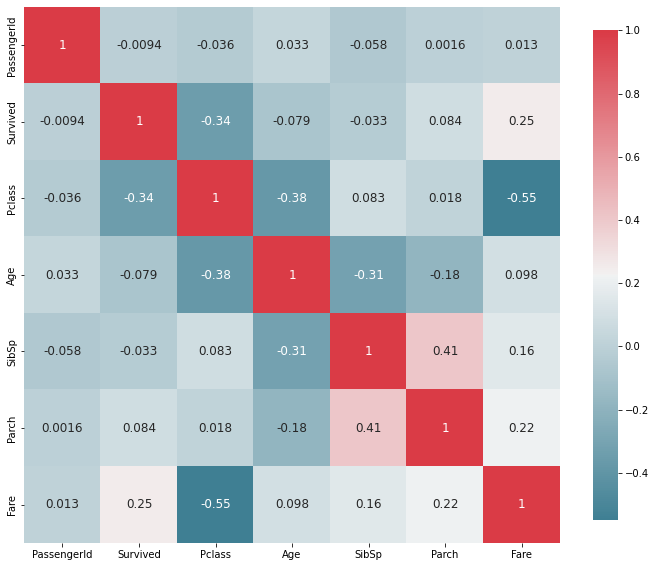

In [ ]:
df = pd.read_csv("titanic.csv")
plot_correlation_map(df)



- Split the dataframe into output and input, then create a logistic regression model. fit it and generate a prediction
- Divisez le dataframe en output et en input, puis créez un modèle de régression logistique, ajustez le et générer une prédiction.

In [ ]:

y= df.pop("Survived")
x=df
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.20, random_state=30)

In [ ]:
x_train

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
199,200,2.0,"Yrois, Miss. Henriette (""Mrs Harbeck"")",female,24.0,0.0,0.0,248747,13.0000,NaN,S
703,704,3.0,"Gallagher, Mr. Martin",male,25.0,0.0,0.0,36864,7.7417,NaN,Q
823,824,3.0,"Moor, Mrs. (Beila)",female,27.0,0.0,1.0,392096,12.4750,E121,S
236,237,2.0,"Hold, Mr. Stephen",male,44.0,1.0,0.0,26707,26.0000,NaN,S
679,680,1.0,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0.0,1.0,PC 17755,512.3292,B51 B53 B55,C
...,...,...,...,...,...,...,...,...,...,...,...
140,141,3.0,"Boulos, Mrs. Joseph (Sultana)",female,NaN,0.0,2.0,2678,15.2458,NaN,C
500,501,3.0,"Calic, Mr. Petar",male,17.0,0.0,0.0,315086,8.6625,NaN,S
813,814,3.0,"Andersson, Miss. Ebba Iris Alfrida",female,6.0,4.0,2.0,347082,31.2750,NaN,S
421,422,3.0,"Charters, Mr. David",male,21.0,0.0,0.0,A/5. 13032,7.7333,NaN,Q


- Check the score of your model, the confusion matrix and other metrics you learned.
- Vérifiez le score de votre modèle, la matrice de confusion et d'autres mesures que vous avez apprises.

ValueError: ignored

In [ ]:
...

In [ ]:
...

In [ ]:
def recall(...):
  ...

In [ ]:
def precision(...):
  ...

In [ ]:
def recall(...):
  ...

 # 2 - Logistic Regression (HR analytics)

- You are now given the 'HR_analytics' dataframe, do all the needed steps to generate a model that predicts whether an employee will leave the company or not using Logistic Regression. Don't forget to calculate the performances using differente metrics at the end of the exercise.
- Vous disposez maintenant du dataframe 'HR_analytics', effectuez toutes les étapes nécessaires pour générer un modèle qui prédit si un employé quittera l'entreprise ou non à l'aide de la régression logistique. N'oubliez pas de calculer les performances à l'aide de différentes métriques à la fin de l'exercice.

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
def accuracy(...):
  ...

In [ ]:
def precision(...):
  ...

In [ ]:
def recall(...):
  ...

# 3 - KNN

- In this exercice you will be building a KNN classifier for the Iris dataset, try loading the iris dataset using load_iris. If you check its datatype you'll notice that it is a type you never heard about (Bunch). to get the inputs and the output try using the ".data" and ".target" attributs of the 'Bunch' object.

- Dans cet exercice, vous allez construire un classificateur KNN pour le dataset Iris, essayez de charger le dataset iris en utilisant load_iris. Si vous vérifiez son type de données, vous remarquerez qu'il s'agit d'un type dont vous n'avez jamais entendu parler (Bunch). pour obtenir les entrées et la sortie, essayez d'utiliser les attributs ".data" et ".target" de l'objet 'Bunch'.

In [ ]:
from sklearn.datasets import load_iris
iris = load_iris()

In [ ]:
x= iris.data
y= iris.target

- You can also try exploring the dataset using functions like '.feature_names' and '.target_names'
- Vous pouvez également essayer d'explorer le dataset à l'aide de fonctions telles que '.feature_names' et '.target_names'

In [ ]:

iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

- Now that you have explored the data, split the dataset and train a KNN classifier with different values for 'K' (use the range function). Once done store the results for the different values of K in a list an try plotting a scatter plot to visualize which value of K is the best. 
- Maintenant que vous avez exploré les données, divisez l'ensemble de données et formez un classificateur KNN avec différentes valeurs pour 'K' (utilisez la fonction range). Une fois cela fait, stockez les résultats pour les différentes valeurs de K dans une liste et essayez de tracer un nuage de points pour visualiser quelle valeur de K est la meilleure.

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=30) 

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score



In [ ]:
n_neighbors=30
score=[]
for k in range(1,30):
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    y_pred=knn.predict(x_test)
    print('Accuracy for k=',k,'is:',(accuracy_score(y_pred,y_test)))
    score.append(round(accuracy_score(y_pred,y_test),2))

Accuracy for k= 1 is: 0.9
Accuracy for k= 2 is: 0.9333333333333333
Accuracy for k= 3 is: 0.9333333333333333
Accuracy for k= 4 is: 0.9
Accuracy for k= 5 is: 0.9333333333333333
Accuracy for k= 6 is: 0.9333333333333333
Accuracy for k= 7 is: 0.9666666666666667
Accuracy for k= 8 is: 0.9666666666666667
Accuracy for k= 9 is: 1.0
Accuracy for k= 10 is: 0.9666666666666667
Accuracy for k= 11 is: 1.0
Accuracy for k= 12 is: 1.0
Accuracy for k= 13 is: 1.0
Accuracy for k= 14 is: 1.0
Accuracy for k= 15 is: 1.0
Accuracy for k= 16 is: 1.0
Accuracy for k= 17 is: 1.0
Accuracy for k= 18 is: 1.0
Accuracy for k= 19 is: 1.0
Accuracy for k= 20 is: 0.9666666666666667
Accuracy for k= 21 is: 1.0
Accuracy for k= 22 is: 0.9666666666666667
Accuracy for k= 23 is: 1.0
Accuracy for k= 24 is: 0.9666666666666667
Accuracy for k= 25 is: 0.9666666666666667
Accuracy for k= 26 is: 0.9333333333333333
Accuracy for k= 27 is: 1.0
Accuracy for k= 28 is: 0.9333333333333333
Accuracy for k= 29 is: 1.0


Text(0, 0.5, 'Testing Accuracy')

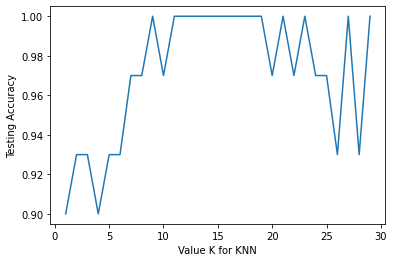

In [ ]:
import matplotlib.pyplot as plt
plt.plot(range(1,30),score)
plt.xlabel('Value K for KNN')
plt.ylabel('Testing Accuracy')

In [ ]:
print('Accuracy for k=',k,'is:',round(accuracy_score(y_pred,y_test)))

Accuracy for k= 29 is: 1


In [ ]:
...

- In the following cell you will try to predict the type of a flower wich has 5cm of sepal length, 4 cm of sepal width, 2cm of petal length and 2cm of petal width.
- Dans la cellule suivante, vous allez essayer de prédire le type d'une fleur qui a 5 cm de longueur de sépale, 4 cm de largeur de sépale, 2 cm de longueur de pétale et 2 cm de largeur de pétale.

In [ ]:
import numpy as np

test = np.array([5,4,2,2]).reshape(1 , -1)
y_predict = knn.predict(test)

In [ ]:
classe = {0:'Setosa', 1:'Versicolor', 2:'Virginica'}

In [ ]:
print('This Flower is a : '+ classe[y_predict[0]])

This Flower is a : Setosa
